In [124]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
import time
from selenium.webdriver.common.keys import Keys
from datetime import datetime
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import csv
import re
import numpy as np

In [2]:
driver=webdriver.Chrome(executable_path='/Users/DELL/Documents/chromedriver')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="e6c0f65c03a1c7f4e49e77e9676f403b")>

In [4]:
time.sleep(4)
driver.get('https://www.instagram.com/')

In [5]:
#logging in to instagram handle
#username
username = driver.find_element_by_name("username")
username.send_keys('username')

#password
password=driver.find_element_by_name('password')
password.send_keys('password')

#submit
password.send_keys('\n')

time.sleep(5)

In [24]:
#search for food to scrape the search results

search = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
search.send_keys('food')

time.sleep(1)

In [25]:
#To store follow count from 10 handles

dict_10_handles={}            #To represent the name and follow count
list_10_handles=[]            #To represent just the name
k=0
t=1

#Using search results
searches= driver.find_element_by_xpath('//div[@class="fuqBx"]/a['+str(t)+']')

#Iterating through first 10 searches

for i in range(10):
    if str(searches.get_attribute('href')).find('tags')>0:  #avoiding tags
        t+=1
        continue
    else:
        try: 
            account = driver.find_element_by_xpath('//div[@class="fuqBx"]/a['+str(t)+']/div/div[2]/div/span')
            print(account.get_attribute('innerHTML'))
            
            #Appending names to the list
            list_10_handles.append(account.get_attribute('innerHTML'))
            
            #Getting to the handle
            searches.click()                
            
            time.sleep(4)
            
            #Number of followers
            fol=driver.find_element_by_xpath('//ul[contains(@class,"_3dEHb")]/li[2]/a/span').get_attribute('title')
            
            #Storing follow count to the dictionary using last element of list
            dict_10_handles[list_10_handles[-1]]=fol
            print(k+1,fol)
            
            #Enter food in the search bar
            search = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
            search.send_keys('food')
            time.sleep(2)
            
            t+=1
            #Updating searches
            searches=driver.find_element_by_xpath('//div[@class="fuqBx"]/a['+str(t)+']')
            
            time.sleep(2)
            
            k+=1
        except NoSuchElementException:  
            continue
    if k==10:
        search.send_keys('\b\b\b\b')
        break
        
print(dict_10_handles)

foodtalkindia
1 298,767
dilsefoodie
2 553,158
foodiekaurexpeditions
3 3,632
foodiesince96
4 253,652
food_belly11
5 7,024
foodys
6 9,197,536
food
7 56,640
meltss_
8 304
foodbossindia
9 155,677
foodinsider
10 2,176,030
{'foodtalkindia': '298,767', 'dilsefoodie': '553,158', 'foodiekaurexpeditions': '3,632', 'foodiesince96': '253,652', 'food_belly11': '7,024', 'foodys': '9,197,536', 'food': '56,640', 'meltss_': '304', 'foodbossindia': '155,677', 'foodinsider': '2,176,030'}


In [147]:
#Sorting dictionary in Decreasing Order
sorted_dict=sorted(dict_10_handles.items(),key=lambda x:float(x[1].replace(',','')),reverse=True)
list_of_5=[]
list_of_5_fols=[]
t=0

#Storing data of top 5 handles
for i in sorted_dict:
    print(i[0],i[1])
    list_of_5.append(i[0])
    list_of_5_fols.append(float(i[1].replace(',','')))
    if t>=4:
        break
    t+=1

foodys 9,197,536
foodinsider 2,176,030
dilsefoodie 553,158
foodtalkindia 298,767
foodiesince96 253,652


In [72]:
#Getting the number of posts in the top 5 handles done within 3 days 
posts_of_5=[]
date_now=datetime.date(datetime.now())


for i in list_of_5:
    count=0
    
    #Searching for the handles
    search = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    search.send_keys(i)
    time.sleep(2)
    driver.find_element_by_partial_link_text(i).click()
    time.sleep(3)
    
    #Accessing posts
    posts = driver.find_elements_by_xpath('//div[contains(@class,"v1Nh3")]')
    t=1

    #Iterating through posts
    for p in posts:
        p.click()

        time.sleep(2)
        date_of_post=driver.find_element_by_xpath('//time[contains(@class,"_1o9PC")]').get_attribute('datetime')[0:10]
        print(date_of_post)
        
        #Comparing current data and date of post
        diff=(pd.to_datetime(date_now)-pd.to_datetime(date_of_post))
        print(diff)
        count+=1
        time.sleep(1)
        
        #To press 'X' button
        try:
            driver.find_elements_by_class_name('wpO6b')[16].click()
        except:
            try:
                driver.find_elements_by_class_name('wpO6b')[30].click()
            except:
                driver.find_elements_by_class_name('wpO6b')[28].click()
        time.sleep(1)
        
        #Break case
        if diff>timedelta(days=3):
            break
        
    #Storing no of posts
    posts_of_5.append(count)    
    t+=1
    print(posts_of_5)
    
    
    

2020-08-05
0 days 00:00:00
2020-08-04
1 days 00:00:00
[1]
2020-08-04
1 days 00:00:00
[1, 0]
2020-08-05
0 days 00:00:00
2020-08-03
2 days 00:00:00
[1, 0, 1]
2020-08-04
1 days 00:00:00
[1, 0, 1, 0]
2020-08-05
0 days 00:00:00
2020-08-05
0 days 00:00:00
2020-08-04
1 days 00:00:00
[1, 0, 1, 0, 2]


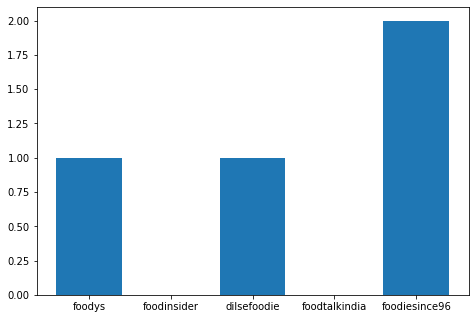

In [74]:
#Plotting the result as a bar graph

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(list_of_5,posts_of_5)
plt.show()

In [142]:
#Creating list of hashtags and finding 5 most frequently used
#Calculating average likes

freq_hashtags={}
avg_likes=[]

#TO remove emojis from hashtags

#Unicodes for emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

#Iterating through 5 insta handles
for i in list_of_5:
    likes=0
    count=0
    search = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    search.send_keys(i)
    time.sleep(2)
    driver.find_element_by_partial_link_text(i).click()
    time.sleep(3)
    posts = driver.find_elements_by_xpath('//div[contains(@class,"v1Nh3")]')
    t=1
    
    #Iterating through 10 posts
    for p in posts:
        p.click()
        time.sleep(1)
        
        #Case when viewing a picture
        try:
            no_of_likes=driver.find_element_by_xpath('//button[contains(@class,"sqdOP")]/span').get_attribute('innerHTML').replace(',','')
        
        #Case when viewing a video
        except:
            driver.find_element_by_class_name('vcOH2').click()
            no_of_likes=driver.find_element_by_xpath('//div[@class="vJRqr"]/span').get_attribute('innerHTML').replace(',','')
            driver.find_element_by_class_name('QhbhU').click()
        
        #adding total no of likes of 10 posts
        likes+=int(no_of_likes)
        
        
        #Extracting hashtags from captions
        caption=driver.find_element_by_xpath('//div[@class="C4VMK"]/span').get_attribute('innerHTML').split(' ')

        for word in caption:
            if remove_emojis(word) !='':
                if word.find('#')>-1: 
                    freq_hashtags[word[word.find('#'):word.find('<')]]=freq_hashtags.get(word[word.find('#'):word.find('<')],0)+1

        time.sleep(2)
        
        try:
            driver.find_elements_by_class_name('wpO6b')[16].click()
        except:
            try:
                driver.find_elements_by_class_name('wpO6b')[30].click()
            except:
                try:
                    driver.find_elements_by_class_name('wpO6b')[28].click()
                except:
                    driver.find_elements_by_class_name('wpO6b')[26].click()
        time.sleep(1)  
        
        #Break case 
        if t==10:
            break
        t+=1
        
    #Calculating average likes and appending
    avg_likes.append(round(likes/10,2))
    print(avg_likes)
    print(freq_hashtags)
    

[6183.0]
{'I': 1, 'can': 1, 'taste': 1, 'this': 1, 'through': 1, 'the': 1, 'phone': 1, 'Chicken': 1, 'cutlet,': 1, 'mozzarella': 1, 'and': 1, 'pesto': 1}
{}
[6183.0, 2029.0]
{'I': 1, 'can': 2, 'taste': 1, 'this': 2, 'through': 1, 'the': 2, 'phone': 1, 'Chicken': 1, 'cutlet,': 1, 'mozzarella': 1, 'and': 1, 'pesto': 1, 'Breweries': 1, 'have': 1, 'been': 1, 'slush-ifying': 1, 'their': 1, 'beers': 1, 'for': 2, 'years': 1, 'but': 1, 'with': 1, 'social': 1, 'distancing': 1, 'measures': 1, 'still': 1, 'in': 3, 'place': 1, 'many': 1, 'cities,': 1, 'you': 2, 'see': 1, 'how': 1, 'to': 2, 'recreate': 1, 'trend': 1, 'right': 1, 'at': 1, 'home.': 1, 'Click': 1, 'link': 1, 'bio': 1, 'learn': 1, 'some': 1, 'key': 1, 'tips': 1, 'which': 1, 'kinds': 1, 'of': 1, 'beer': 1, 'should': 1, 'be': 1, 'using.<br><br>(Credit:': 1, 'Courtney': 1, 'Iseman,': 1, 'Eileen': 1, 'Cofre/': 1, 'class="': 4, 'xil3i"': 4}
{'#beer': 1, '#beerslushie': 1, '#happyhour': 1, '#summer': 1}
[6183.0, 2029.0, 1648.0]
{'I': 1, 'can

In [117]:
#Writing into a csv file

header = ['word','frequency']
with open('word_frequencies.csv','wt') as f:
    csv_writer=csv.writer(f)
    csv_writer.writerow(header)
    
    for word,freq in freq_hashtags.items():
        csv_writer.writerow([word.replace('#',''),freq])

In [118]:
#Reading the csv file

with open('word_frequencies.csv','rt') as f:
    csv_reader=csv.reader(f)
    for line in csv_reader:
        print(line)

['word', 'frequency']
[]
['I', '1']
[]
['can', '1']
[]
['taste', '1']
[]
['this', '1']
[]
['through', '1']
[]
['the', '1']
[]
['phone', '1']
[]
['Chicken', '1']
[]
['cutlet,', '1']
[]
['mozzarella', '1']
[]
['and', '1']
[]
['pesto', '1']
[]
['Chocolate', '1']
[]
['chip', '1']
[]
['cookies', '1']
[]
['to', '1']
[]
['make', '1']
[]
['you', '1']
[]
['drool', '1']
[]
['Watching', '1']
[]
['pizza', '1']
[]
['being', '1']
[]
['made', '1']
[]
['makes', '1']
[]
['me', '1']
[]
['so', '1']
[]
['hungry,', '1']
[]
['anyone', '1']
[]
['else?', '1']
[]


In [123]:
#Finding top 5 used hashtags

#Sorting in Descending order
sorted_hashtag=sorted(freq_hashtags.items(),key=lambda x:float(x[1]),reverse=True)
top_words={}
t=0

#Extracting top 5
for i in sorted_hashtag:
    print(i[0],i[1])
    top_words[i[0]]=i[1]
    if t==4:
        break
    t+=1

    

#beer 1
#beerslushie 1
#happyhour 1
#summer 1
#dilsefoodie 1


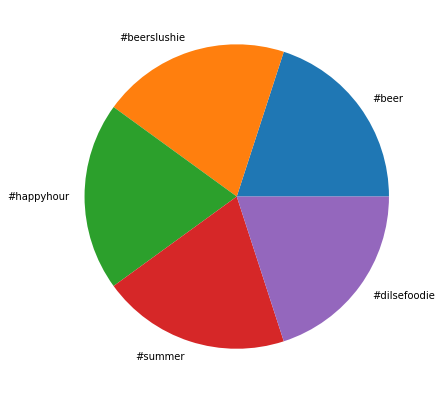

In [125]:
#Plotting a pie chart

fig=plt.figure(figsize=(10,7))
lab=[]
data=[]
for x,y in top_words.items():
    lab.append(x)
    data.append(y)
plt.pie(data,labels=lab)
plt.show()

In [148]:
#Calculating follow to like ratio

follow_to_like_ratio=[]
for i in range(5):
    follow_to_like_ratio.append(round(list_of_5_fols[i]/avg_likes[i],2))
print(follow_to_like_ratio)

[1487.55, 1072.46, 335.65, 100.83, 221.72]


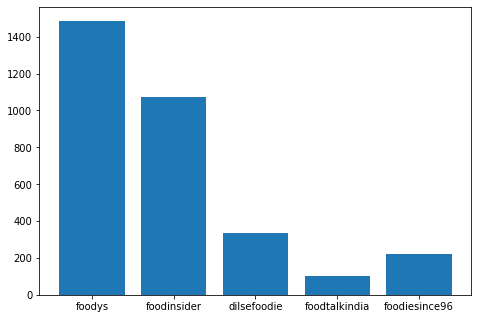

In [149]:
#Plotting the bar graph

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(list_of_5,follow_to_like_ratio)
plt.show()